# Lab 10

## I. Hill Climbing


The Hill Climbing Method is a simple optimization algorithm that tries to find the optimal solution to a problem by iteratively improving the current solution. It is a local search algorithm, which means that it only considers the solutions that are in the neighborhood of the current solution.

Here's how the Hill Climbing Method works:

1. Start with an initial state -- a candidate to the solution of the problem.

2. Evaluate the current state to determine its quality or fitness.

3. Generate a set of neighboring states by making small modifications to the current one.

3. Evaluate the fitness of each neighboring state.

4. Select the best neighboring state and make it the new current one.

5. Repeat steps 3 to 5 until no further improvement can be made or a predefined stopping criterion is met.

One of the main advantages of the Hill Climbing Method is its simplicity and ease of implementation. 

Consider the Bukin funcion N6, from the basic optimisation benchmark set:

$$f(x,y) =  100 \sqrt{|y-0.01 x^2|}+ 0.01 |x+10|.$$

For $-15 \leqq x \leqq -5$ and $-3 \leqq y \leqq 3$ we have a minimum point $f(-10, 1) = 0$.


*Ex. 1:*

Implement a function $f$ for this function and represent it graphic using matplotlib.

<IPython.core.display.Javascript object>


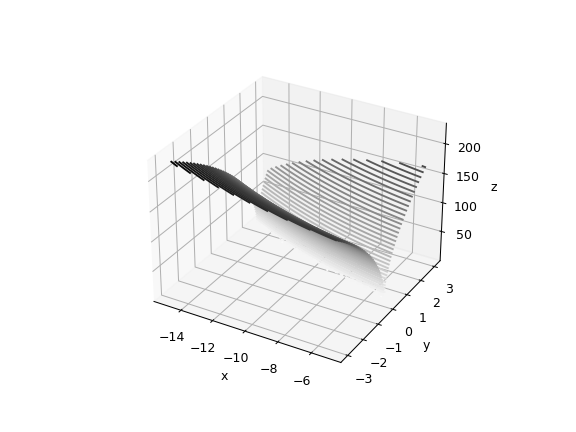

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

def bukin(x, y):
    term1 = 100 * np.sqrt(abs(y - 0.01 * x**2))
    term2 = 0.01 * abs(x + 10)
    return term1 + term2

x = np.linspace(-15, -5, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = bukin(X, Y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

*Ex. 2:* 

Write a Hill Climbing algorithm that finds this functions minimum.

Hints: 

define a state, define a neighbour, choose a proper stop criteria before implementing the algorithm.

In [3]:
import random

#−15≦𝑥≦−5 and  −3≦𝑦≦3
def neighborhood(x, y):
    neighbors = []
    step = 0.01
    if -15 <= x <= -5:
        if -3 <= y - step <= 3:
            neighbors.append((x, y-step))
        if -3 <= y + step <= 3:
            neighbors.append((x, y+step))
    if -15 <= x + step <= -5:
        if -3 <= y <= 3:
            neighbors.append((x+step, y))
        if -3 <= y + step <= 3:
            neighbors.append((x+step, y+step))
        if -3 <= y - step <= 3:
            neighbors.append((x+step, y-step))
    if -15 <= x - step <= -5:
        if -3 <= y <= 3:
            neighbors.append((x-step, y))
        if -3 <= y + step <= 3:
            neighbors.append((x-step, y+step))
        if -3 <= y - step <= 3:
            neighbors.append((x-step, y-step))
    

def HC():
    x = random.randint(-15,-5)
    y = random.randint(-3,5)
    bs = bukin(x,y)
    k = 0
    while(True):
        n = neighborhood(x, y)
        if n is None:
                break
        lm = bukin(n[0][0],n[0][1])
        idx = 0
        for i in range(len(n)):
            if(bukin(n[i][0], n[i][1]) < lm):
                lm = bukin(n[i][0], n[i][1])
                idx = i
        if(lm > bs):
            break
        k += 1
        x = n[idx][0]
        y = n[idx][1]
        bs = lm
    
    print(x)
    print(y)
    return bs

HC()

-12
-2


185.4923699099141

*Ex. 3:* for 1 point 

Implement a hill climbing algorithm for the knapsack problem. 

Hints:
For n elements:

we begin with an empty string of n zeros.

a neighbour is constructed by switching of zero into an one at a position in the array

Does it find the optimum? 



*Ex. 4:* for 1 point

Improve it to increase the chances of finding the solution.  